In [1]:
library(Seurat)
library(dplyr)
library(magrittr)
IRdisplay::display_html("<style> .container { width:95% !important; } </style>")
#library("readxl")
library("ggplot2")
library("xlsx")
#library(mgsa)
library(grid)
library(scales)

Registered S3 method overwritten by 'R.oo':
  method        from       
  throw.default R.methodsS3

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



read seurat object

In [ ]:
LHb.integrated<-readRDS(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/LHb_integrated_0.8.rds")
new.ident <- c("MHb1","MHb2","MHb3","LHb1","LHb2","LHb3","MHb4","LHb4","MHb5","LHb5","LHb6","MHb6","Surr1","Surr2","Surr3","Surr4")
names(x = new.ident) <- levels(x =LHb.integrated)
LHb.integrated<- RenameIdents(object =LHb.integrated, new.ident)

# Feature map

In [ ]:
LHb.integrated<-readRDS(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/LHb_integrated_0.8.rds")
cntl<-readRDS("/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/cntl_0.8.rds")
stim<-readRDS("/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/stim_0.8.rds")

In [61]:
F<-FeaturePlot(object =LHb.integrated,pt.size=1.2,max.cutoff=3,min.cutoff=0,features = c("Pcdh10"))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/feature_habenular_Pcdh10.pdf",width=10,height=10)

In [176]:
F<-FeaturePlot(object =LHb.integrated,pt.size=1.2,max.cutoff=3,min.cutoff=0,features = c("Pcdh10"))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/feature_habenular_Pcdh10_03.pdf",width=10,height=10)

In [177]:
F<-FeaturePlot(object =LHb.integrated,pt.size=1.2,max.cutoff=3,min.cutoff=0,features = c("Tac2"))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/feature_habenular_Tac2_03.pdf",width=10,height=10)

In [178]:
F<-FeaturePlot(object =LHb.integrated,pt.size=1.2,max.cutoff=3,min.cutoff=0,features = c("Slc17a6"))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/feature_habenular_Slc17a6_03.pdf",width=10,height=10)

In [55]:
F<-FeaturePlot(object =LHb.integrated,pt.size=1.2,max.cutoff=3,features = c("Cd47"),min.cutoff=0)
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/feature_habenular_Cd47.pdf",width=10,height=10)

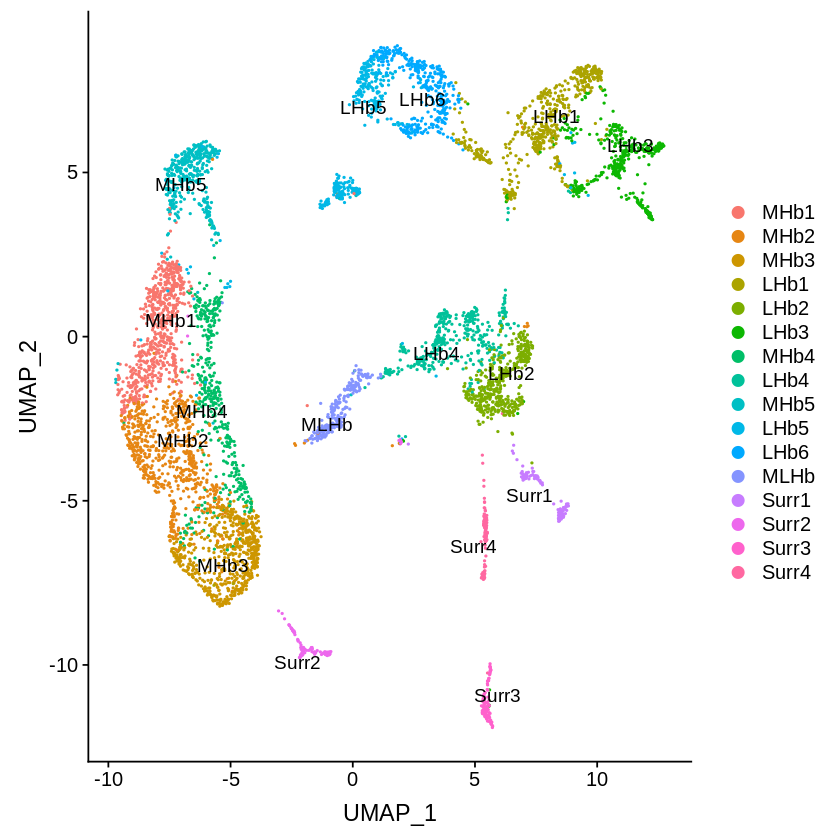

In [32]:
# umap with name
DimPlot(object = LHb.integrated, reduction = "umap", label = TRUE, repel = TRUE) 
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/umap_name_2000_30_0.8.pdf",width=10,height=12)

# Tree


In [6]:
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(LHb.integrated@assays$RNA@data[,which(Idents(object=LHb.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
assign(paste(new.ident[i],"_barcode_cntl",sep=""),intersect(colnames(cntl@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_stim",sep=""),intersect(colnames(stim@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))}

In [7]:
LHb.integrated<-subset(x=LHb.integrated,cells=c(MHb1_barcode,MHb2_barcode,MHb3_barcode,LHb1_barcode,LHb2_barcode,LHb3_barcode,MHb4_barcode,MHb5_barcode,LHb4_barcode,LHb5_barcode,MHb6_barcode,LHb6_barcode))

In [8]:
DefaultAssay(object = LHb.integrated)<-"RNA"

In [9]:
pdf(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/cluster_tree_clean_L.pdf",width=20,height=8,paper='special') 
#https://www.rdocumentation.org/packages/ape/versions/5.2/topics/plot.phylo
L <- BuildClusterTree(L, verbose = FALSE, reorder = FALSE)
plot(L@tools$BuildClusterTree, type = "phylogram", edge.color = "black", edge.width = 4,edge.lty = 1, srt = 0, label.offset = 10, direction = "downwards", tip.color = "black")
dev.off()

png 
  2

In [10]:
pdf(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/cluster_tree_clean_M.pdf",width=20,height=8,paper='special') 
M<- BuildClusterTree(M, verbose = FALSE, reorder = FALSE)
plot(M@tools$BuildClusterTree, type = "phylogram", edge.color = "black", edge.width = 4,edge.lty = 1, srt = 0, label.offset = 10, direction = "downwards", tip.color = "black")
dev.off()

png 
  2

# Umap

In [56]:
color<-c("#f5a894","#564154","#ff6542","#724667","#6d5f5c","#bbd1e3","#e0cba8","#386fa4","#b6275f","#150578","#a7b99b","#ecd444")

Warning message:
“Removed 105 rows containing missing values (geom_point).”

Warning message:
“Removed 105 rows containing missing values (geom_point).”

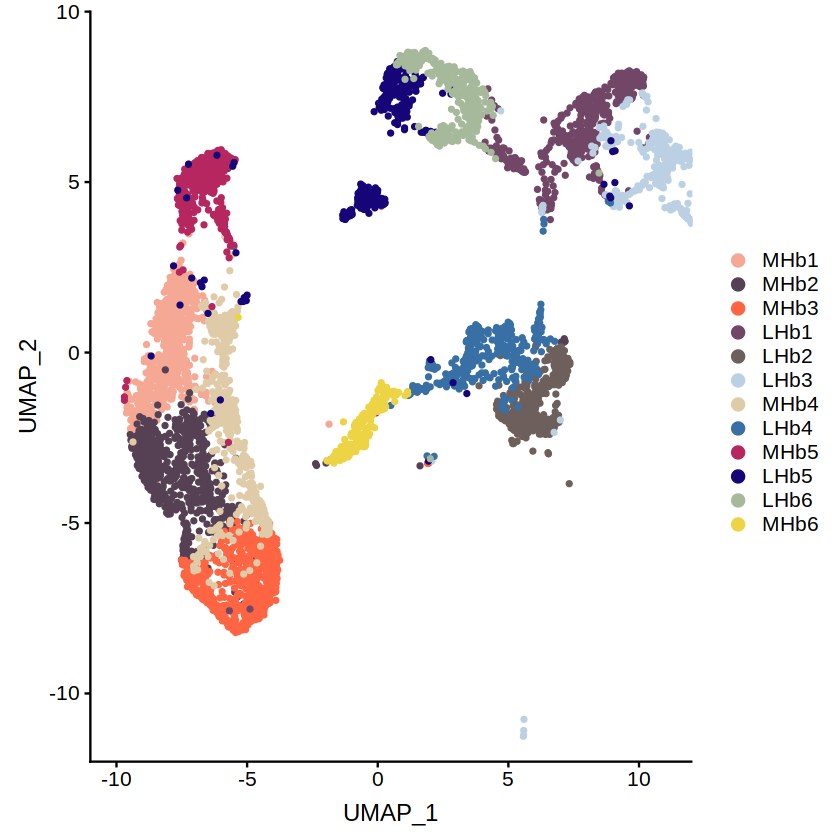

In [58]:
# umap removing surrounding regions
DimPlot(object = LHb.integrated, reduction = "umap", label = FALSE, repel = TRUE,cols=color,label.size = 12,pt.size=1.0) +
scale_y_continuous(expand = c(0,0), limits = c(-12, 10)) +scale_x_continuous(expand = c(0,0), limits = c(-11, 12))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/umap_name_2000_30_0.8clean_noname.pdf",width=10,height=12)

Warning message:
“Removed 4 rows containing missing values (geom_point).”

Warning message:
“Removed 4 rows containing missing values (geom_point).”

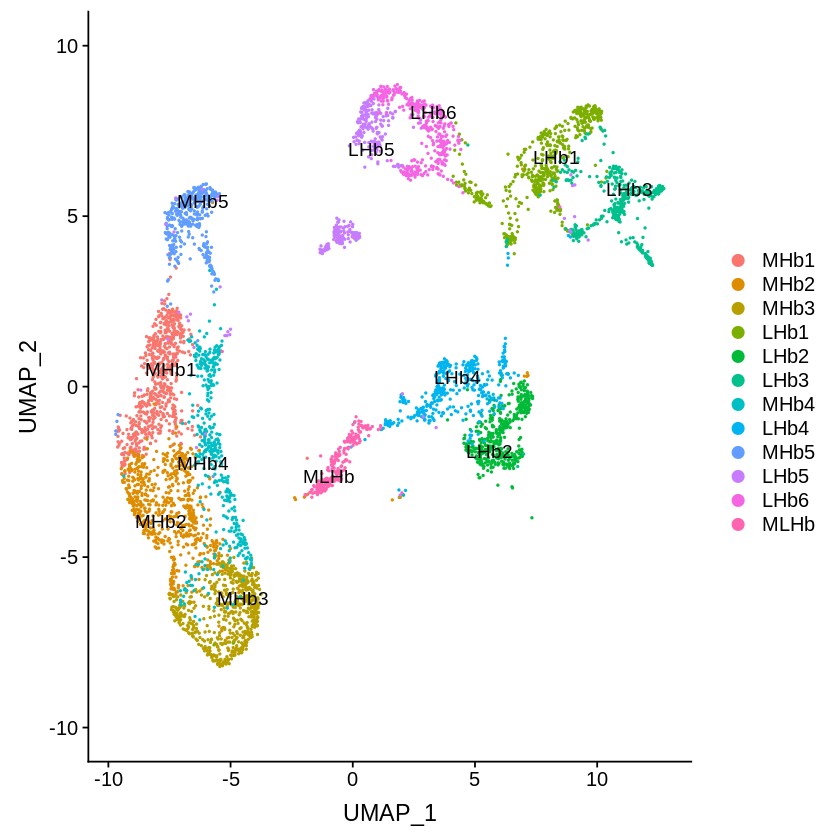

In [38]:
# umap removing surrounding regions
DimPlot(object = LHb.integrated, reduction = "umap", label = TRUE, repel = TRUE)+ylim(-10,10)
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/umap_name_2000_30_0.8clean.pdf",width=10,height=12)

# UMI/gene per cell plot

In [111]:
Cell_type<-c("MHb3","MHb6","MHb4","MHb5","MHb1","MHb2","LHb2","LHb1","LHb3","LHb6","LHb4","LHb5")
colors<-c("#ff6542","#ecd444","#e0cba8","#b6275f","#f5a894","#564154","#6d5f5c","#724667","#bbd1e3","#a7b99b","#386fa4","#150578")

In [112]:
type<-numeric()
for (i in 1:dim(LHb.integrated@meta.data)[1]){
    for (j in 1:length(Cell_type)){
    if(rownames(LHb.integrated@meta.data)[i] %in% eval(parse(text=paste(Cell_type[j],"_barcode",sep="")))){type[i]<-Cell_type[j]}
  }
}
LHb.integrated@meta.data$type<-type    

In [113]:
LHb.integrated@meta.data$type<-factor(LHb.integrated@meta.data$type,levels=Cell_type)

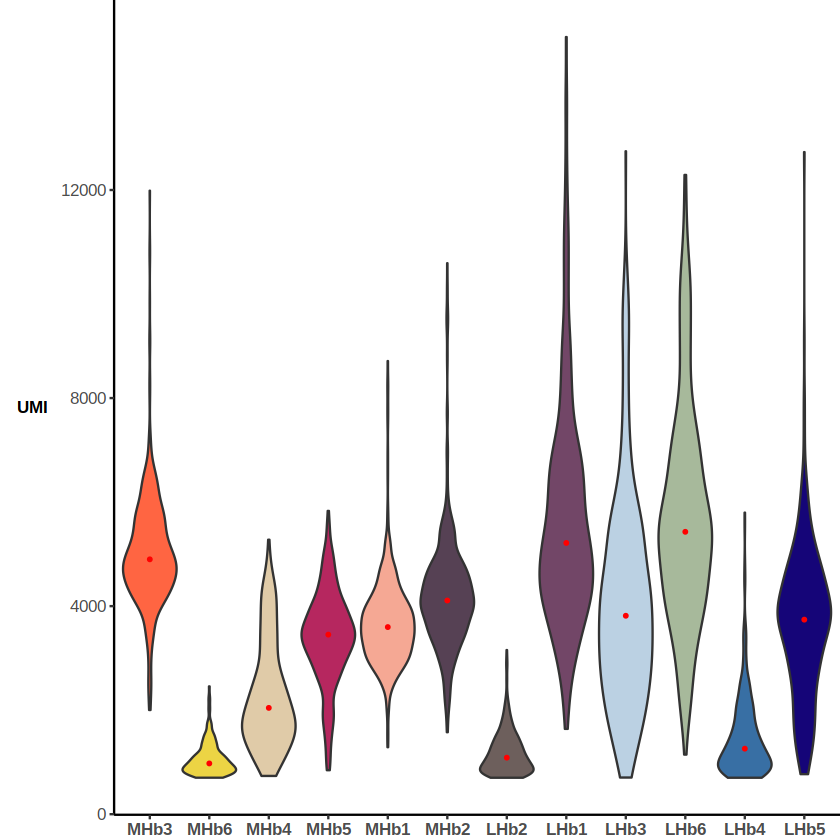

In [114]:
ggplot(LHb.integrated@meta.data,aes_string(x="type",y="nCount_RNA",fill="type"))+geom_violin(scale = "width")+scale_fill_manual(values=colors)+
stat_summary(fun.y=median, geom="point", size=0.6, color="red")+ylab("UMI")+ 
theme(axis.title.x=element_blank(),
,axis.text.y=element_text(size=10),axis.title.y=element_text(size=10,angle=0,face="bold",margin = margin(t = 10, r = 8, b = 0, l = 10),vjust=0.5),axis.text.x=element_text(size=10,face="bold")
,axis.title=element_text(size=15,face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"),legend.position="none",plot.margin = unit(c(0, 0,0, 0), "cm"))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/UMI_celltype2.pdf",height=6, width=10 , paper = "letter")

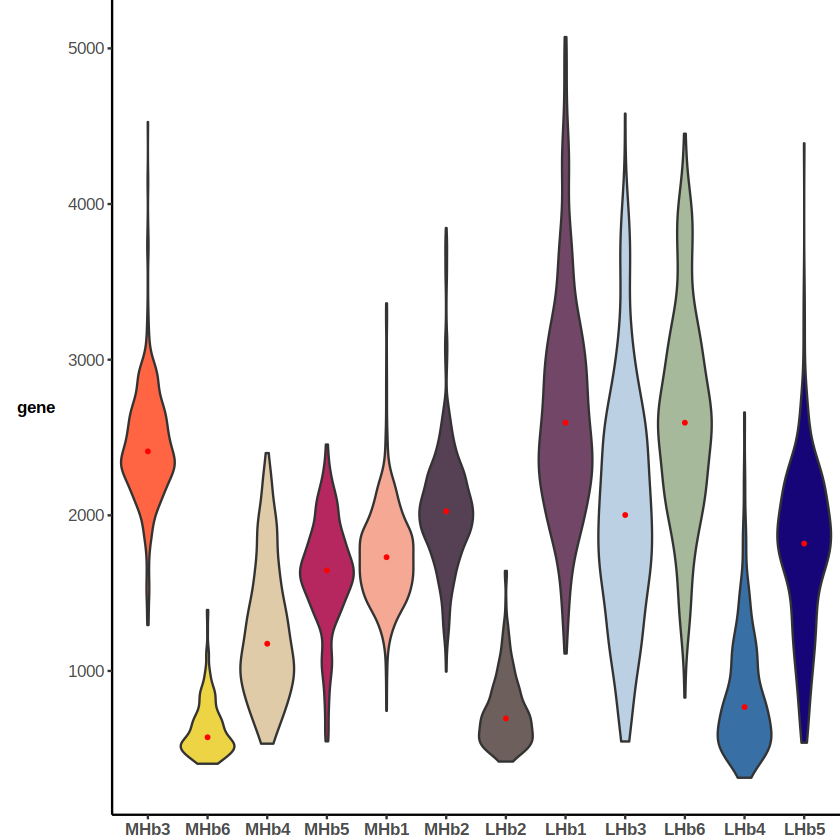

In [115]:
ggplot(LHb.integrated@meta.data,aes_string(x="type",y="nFeature_RNA",fill="type"))+geom_violin(scale = "width")+scale_fill_manual(values=colors)+
stat_summary(fun.y=median, geom="point", size=0.6, color="red")+ylab("gene")+ 
theme(axis.title.x=element_blank(),
,axis.text.y=element_text(size=10),axis.title.y=element_text(size=10,angle=0,face="bold",margin = margin(t = 10, r = 8, b = 0, l = 10),vjust=0.5),axis.text.x=element_text(size=10,face="bold")
,axis.title=element_text(size=15,face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"),legend.position="none",plot.margin = unit(c(0, 0,0, 0), "cm"))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/gene_celltype2.pdf",height=6, width=10 , paper = "letter")

# combined MHB vs LHb markers

In [11]:
Idents(LHb.integrated)<-(gsub('[0-9]+', '', Idents(LHb.integrated)))

In [12]:
one.markers <- FindConservedMarkers(LHb.integrated,ident.1 = c("LHb"),ident.2 = c("MHb"),  grouping.var = "stim", print.bar = FALSE)
sort_marker<-one.markers[order(-one.markers["cntl_avg_logFC"]),]
A<-rowSums(as.matrix(LHb.integrated@assays$RNA@data))
A<-A[A>0]
B<-as.data.frame(A)
B<-rownames(B)

genes<-B
sort_marker$cntl_p_val_adjust<-sort_marker$cntl_p_val*length(genes)
sort_marker$stim_p_val_adjust<-sort_marker$stim_p_val*length(genes)
write.xlsx2(subset(sort_marker,cntl_avg_logFC>0 & cntl_p_val_adjust<0.05 & stim_p_val_adjust<0.05),file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/class_genes/conserved_markers_LHB_overMHbgene_eachcombined.xlsx")

Testing LHb_cntl vs MHb_cntl

Testing LHb_stim vs MHb_stim



In [13]:
one.markers <- FindConservedMarkers(LHb.integrated,ident.1 = c("MHb"),ident.2 = c("LHb"),  grouping.var = "stim", print.bar = FALSE)
sort_marker<-one.markers[order(-one.markers["cntl_avg_logFC"]),]
A<-rowSums(as.matrix(LHb.integrated@assays$RNA@data))
A<-A[A>0]
B<-as.data.frame(A)
B<-rownames(B)

genes<-B
sort_marker$cntl_p_val_adjust<-sort_marker$cntl_p_val*length(genes)
sort_marker$stim_p_val_adjust<-sort_marker$stim_p_val*length(genes)
write.xlsx2(subset(sort_marker,cntl_avg_logFC>0 & cntl_p_val_adjust<0.05 & stim_p_val_adjust<0.05),file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/class_genes/conserved_markers_MHB_overLHbgene_eachcombined.xlsx")

Testing MHb_cntl vs LHb_cntl

Testing MHb_stim vs LHb_stim



In [33]:
#marker in each cell type, need to make idents back to original
for (i in 1:length(new.ident)){
one.markers <- FindConservedMarkers(LHb.integrated, ident.1 = new.ident[i], grouping.var = "stim", 
    print.bar = FALSE)
one.markers<-subset(one.markers,stim_p_val_adj<0.05 & cntl_p_val_adj<0.05 & cntl_avg_logFC>0 & stim_avg_logFC>0)
sort_marker<-one.markers[order(-one.markers["stim_avg_logFC"]),]
write.xlsx2(sort_marker,file=(paste("/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/conserved_markers/",new.ident[i],"_gene.xlsx",sep="")))}

Testing MHb1_cntl vs MHb2_cntl, MHb3_cntl, LHb1_cntl, LHb2_cntl, LHb3_cntl, MHb4_cntl, LHb4_cntl, MHb5_cntl, LHb5_cntl, LHb6_cntl, MHb6_cntl

Testing MHb1_stim vs MHb2_stim, MHb3_stim, LHb1_stim, LHb2_stim, LHb3_stim, MHb4_stim, LHb4_stim, MHb5_stim, LHb5_stim, LHb6_stim, MHb6_stim

Testing MHb2_cntl vs MHb1_cntl, MHb3_cntl, LHb1_cntl, LHb2_cntl, LHb3_cntl, MHb4_cntl, LHb4_cntl, MHb5_cntl, LHb5_cntl, LHb6_cntl, MHb6_cntl

Testing MHb2_stim vs MHb1_stim, MHb3_stim, LHb1_stim, LHb2_stim, LHb3_stim, MHb4_stim, LHb4_stim, MHb5_stim, LHb5_stim, LHb6_stim, MHb6_stim

Testing MHb3_cntl vs MHb1_cntl, MHb2_cntl, LHb1_cntl, LHb2_cntl, LHb3_cntl, MHb4_cntl, LHb4_cntl, MHb5_cntl, LHb5_cntl, LHb6_cntl, MHb6_cntl

Testing MHb3_stim vs MHb1_stim, MHb2_stim, LHb1_stim, LHb2_stim, LHb3_stim, MHb4_stim, LHb4_stim, MHb5_stim, LHb5_stim, LHb6_stim, MHb6_stim

Testing LHb1_cntl vs MHb1_cntl, MHb2_cntl, MHb3_cntl, LHb2_cntl, LHb3_cntl, MHb4_cntl, LHb4_cntl, MHb5_cntl, LHb5_cntl, LHb6_cntl, MHb6_cntl

Testin

ERROR: Error in FindConservedMarkers(LHb.integrated, ident.1 = new.ident[i], : Identity: Surr1 not present in group cntl


# Proportion of cells in each cluster

In [193]:
Cell_type<-c("MHb3","MHb6","MHb4","MHb5","MHb1","MHb2")
# make a data frame for cell number (this data frame is a simple version giving single value for each cluster) 
Cell_number<- data.frame("type" =Cell_type)
# be careful with how you define factor and levels
as.factor(Cell_number$type)
levels(Cell_number$type)<-c("MHb3","MHb6","MHb4","MHb5","MHb1","MHb2")

Numberofcells<-vector(mode="numeric", length=0)
proportion<-vector(mode="numeric", length=0)

for (i in 1:dim(Cell_number)[1]){Numberofcells[i]<-length(eval(parse(text = paste(Cell_number$type[i],"_barcode",sep=""))))}
Cell_number$len<-Numberofcells

for (i in 1:dim(Cell_number)[1]){proportion[i]<-100*length(eval(parse(text = paste(Cell_number$type[i],"_barcode",sep=""))))/sum(Cell_number$len)}
Cell_number$prop<-proportion

[1] MHb3 MHb6 MHb4 MHb5 MHb1 MHb2
Levels: MHb1 MHb2 MHb3 MHb4 MHb5 MHb6

In [176]:
#Mhb
colors<-c("#ff6542","#ecd444","#e0cba8","#b6275f","#f5a894","#564154")

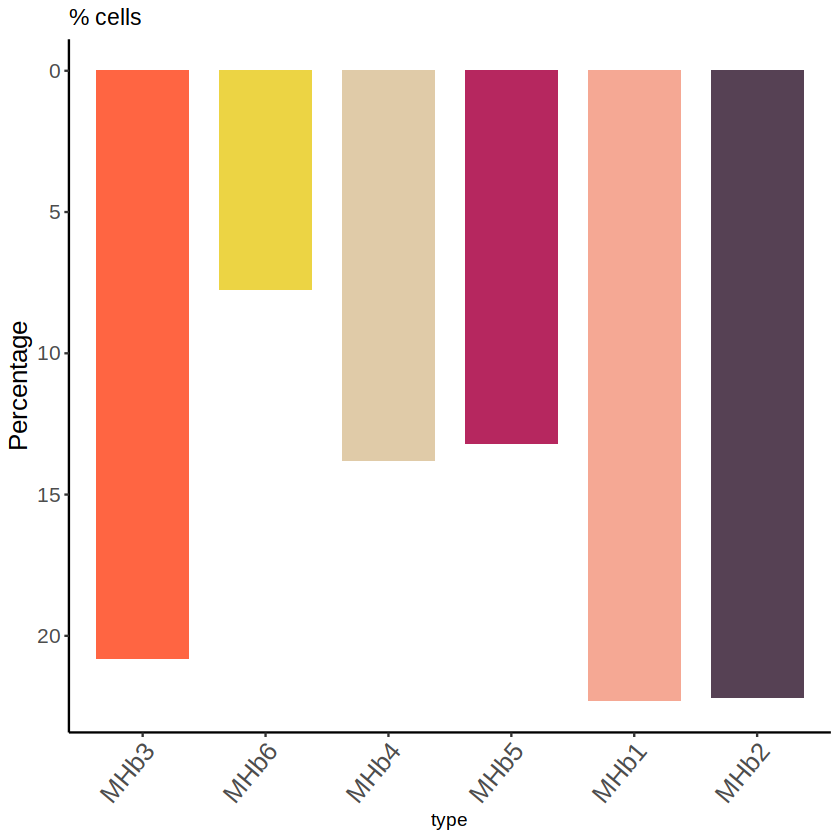

In [177]:
# proportion of cells
ggplot(Cell_number,aes(x=type,y=proportion,fill=Cell_type, width=.75))+geom_bar(stat = "identity",position=position_dodge())+ylab("Percentage")+
#scale_fill_manual(values=c("Astrocyte1"="#19647e","Oligo1"="#ffc857","Neuron1"="#9B0C1E","Neuron2"="#9B0C1E","Neuron3"="#9B0C1E","Neuron4"="#9B0C1E","Neuron5"="#9B0C1E","Neuron6"="#9B0C1E","OPC1"="#4b3f72","OPC2"="#4b3f72","Oligo2"="#ffc857","Neuron7"="#9B0C1E","Microglia"="#676833","Neuron8"="#9B0C1E","Mural"="#b7b7b7","Endotherial"="#E8C6C7","OPC3"="#4b3f72","Oligo3"="#ffc857","Astrocyte2"="#19647e","Eppen"="#B99A69"))+ 
scale_fill_manual(values=colors)+
scale_y_reverse()+
theme(legend.position="none",axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle("% cells")
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/percent of cells_combine_percluster_MHb.pdf",height=6, width=10 , paper = "letter")

In [195]:
scale_fill_manual(values=cCell_type<-c("LHb2","LHb1","LHb3","LHb6","LHb4","LHb5")
# make a data frame for cell number (this data frame is a simple version giving single value for each cluster) 
Cell_number<- data.frame("type" =Cell_type)
# be careful with how you define factor and levels
as.factor(Cell_number$type)
levels(Cell_number$type)<-c("LHb2","LHb1","LHb3","LHb6","LHb4","LHb5")

Numberofcells<-vector(mode="numeric", length=0)
proportion<-vector(mode="numeric", length=0)

for (i in 1:dim(Cell_number)[1]){Numberofcells[i]<-length(eval(parse(text = paste(Cell_number$type[i],"_barcode",sep=""))))}
Cell_number$len<-Numberofcells

for (i in 1:dim(Cell_number)[1]){proportion[i]<-100*length(eval(parse(text = paste(Cell_number$type[i],"_barcode",sep=""))))/sum(Cell_number$len)}
Cell_number$prop<-proportion

[1] LHb2 LHb1 LHb3 LHb6 LHb4 LHb5
Levels: LHb1 LHb2 LHb3 LHb4 LHb5 LHb6

In [142]:
#Lhb
colors<-c("#6d5f5c","#724667","#bbd1e3","#a7b99b","#386fa4","#150578")

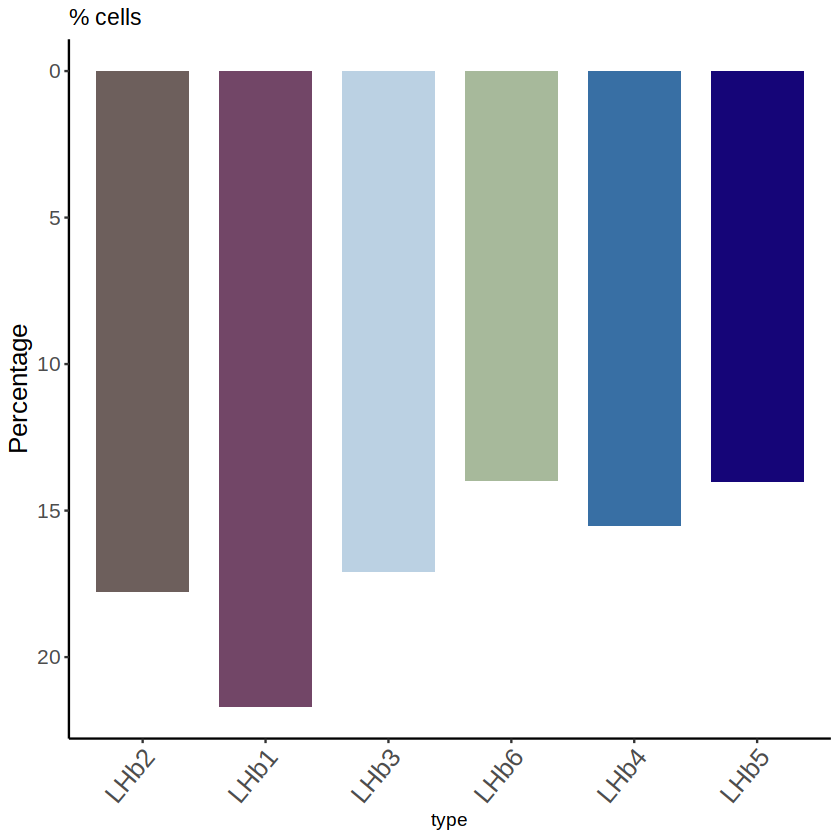

In [143]:
# proportion of cells
ggplot(Cell_number,aes(x=type,y=proportion,fill=Cell_type, width=.75))+geom_bar(stat = "identity",position=position_dodge())+ylab("Percentage")+
#scale_fill_manual(values=c("Astrocyte1"="#19647e","Oligo1"="#ffc857","Neuron1"="#9B0C1E","Neuron2"="#9B0C1E","Neuron3"="#9B0C1E","Neuron4"="#9B0C1E","Neuron5"="#9B0C1E","Neuron6"="#9B0C1E","OPC1"="#4b3f72","OPC2"="#4b3f72","Oligo2"="#ffc857","Neuron7"="#9B0C1E","Microglia"="#676833","Neuron8"="#9B0C1E","Mural"="#b7b7b7","Endotherial"="#E8C6C7","OPC3"="#4b3f72","Oligo3"="#ffc857","Astrocyte2"="#19647e","Eppen"="#B99A69"))+ 
scale_fill_manual(values=colors)+
scale_y_reverse()+
theme(legend.position="none",axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle("% cells")
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/percent of cells_combine_percluster_LHb.pdf",height=6, width=10 , paper = "letter")

subset version

In [198]:
Cell_type<-c("MHb3","MHb6","MHb4","MHb5","MHb1","MHb2")
# make a data frame for cell number (this data frame is a simple version giving single value for each cluster) 
Cell_number<- data.frame("type" =Cell_type)
# be careful with how you define factor and levels
as.factor(Cell_number$type)
levels(Cell_number$type)<-c("MHb3","MHb6","MHb4","MHb5","MHb1","MHb2")

Numberofcells<-vector(mode="numeric", length=0)
proportion<-vector(mode="numeric", length=0)

for (i in 1:dim(Cell_number)[1]){Numberofcells[i]<-length(eval(parse(text = paste(Cell_number$type[i],"_barcode",sep=""))))}
Cell_number$len<-Numberofcells

for (i in 1:dim(Cell_number)[1]){proportion[i]<-100*length(eval(parse(text = paste(Cell_number$type[i],"_barcode",sep=""))))/dim(LHb.integrated@assays$RNA@data)[2]}
Cell_number$prop<-proportion

[1] MHb3 MHb6 MHb4 MHb5 MHb1 MHb2
Levels: MHb1 MHb2 MHb3 MHb4 MHb5 MHb6

In [199]:
#Mhb
colors<-c("#ff6542","#ecd444","#e0cba8","#b6275f","#f5a894","#564154")

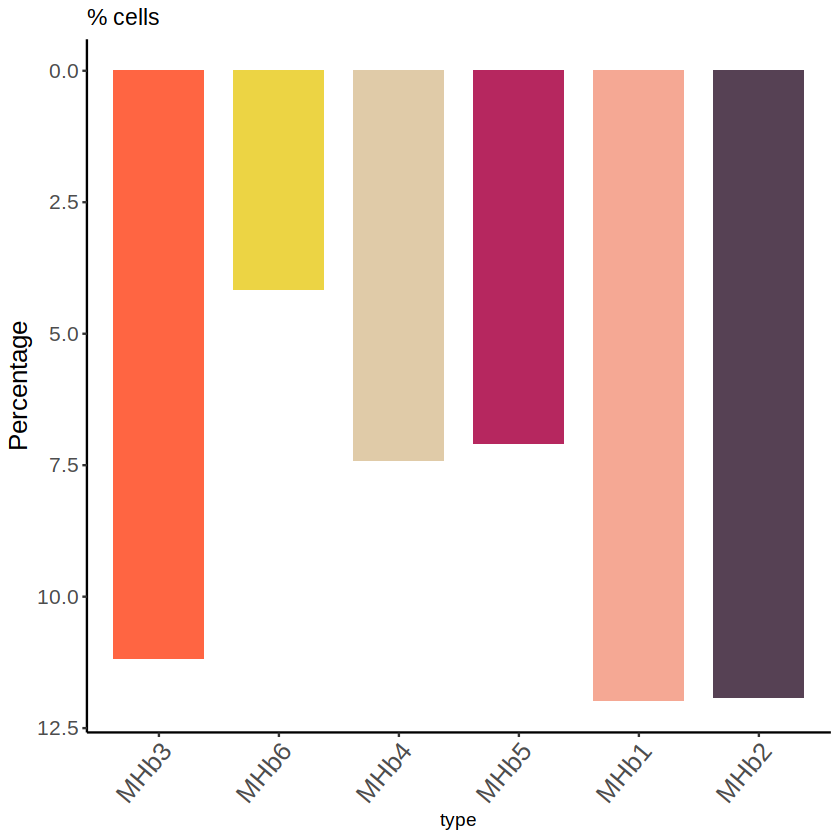

In [201]:
# proportion of cells
ggplot(Cell_number,aes(x=type,y=proportion, fill=Cell_type,width=.75))+geom_bar(stat = "identity",position=position_dodge())+ylab("Percentage")+
#scale_fill_manual(values=c("Astrocyte1"="#19647e","Oligo1"="#ffc857","Neuron1"="#9B0C1E","Neuron2"="#9B0C1E","Neuron3"="#9B0C1E","Neuron4"="#9B0C1E","Neuron5"="#9B0C1E","Neuron6"="#9B0C1E","OPC1"="#4b3f72","OPC2"="#4b3f72","Oligo2"="#ffc857","Neuron7"="#9B0C1E","Microglia"="#676833","Neuron8"="#9B0C1E","Mural"="#b7b7b7","Endotherial"="#E8C6C7","OPC3"="#4b3f72","Oligo3"="#ffc857","Astrocyte2"="#19647e","Eppen"="#B99A69"))+ 
scale_fill_manual(values=colors)+
scale_y_reverse()+
theme(legend.position="none",axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle("% cells")
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/percent of cells_combine_percluster_MHb_allneurons.pdf",height=6, width=10 , paper = "letter")

In [202]:
Cell_type<-c("LHb2","LHb1","LHb3","LHb6","LHb4","LHb5")
# make a data frame for cell number (this data frame is a simple version giving single value for each cluster) 
Cell_number<- data.frame("type" =Cell_type)
# be careful with how you define factor and levels
as.factor(Cell_number$type)
levels(Cell_number$type)<-c("LHb2","LHb1","LHb3","LHb6","LHb4","LHb5")

Numberofcells<-vector(mode="numeric", length=0)
proportion<-vector(mode="numeric", length=0)

for (i in 1:dim(Cell_number)[1]){Numberofcells[i]<-length(eval(parse(text = paste(Cell_number$type[i],"_barcode",sep=""))))}
Cell_number$len<-Numberofcells

for (i in 1:dim(Cell_number)[1]){proportion[i]<-100*length(eval(parse(text = paste(Cell_number$type[i],"_barcode",sep=""))))/dim(LHb.integrated@assays$RNA@data)[2]}
Cell_number$prop<-proportion

[1] LHb2 LHb1 LHb3 LHb6 LHb4 LHb5
Levels: LHb1 LHb2 LHb3 LHb4 LHb5 LHb6

In [203]:
#Lhb
colors<-c("#6d5f5c","#724667","#bbd1e3","#a7b99b","#386fa4","#150578")

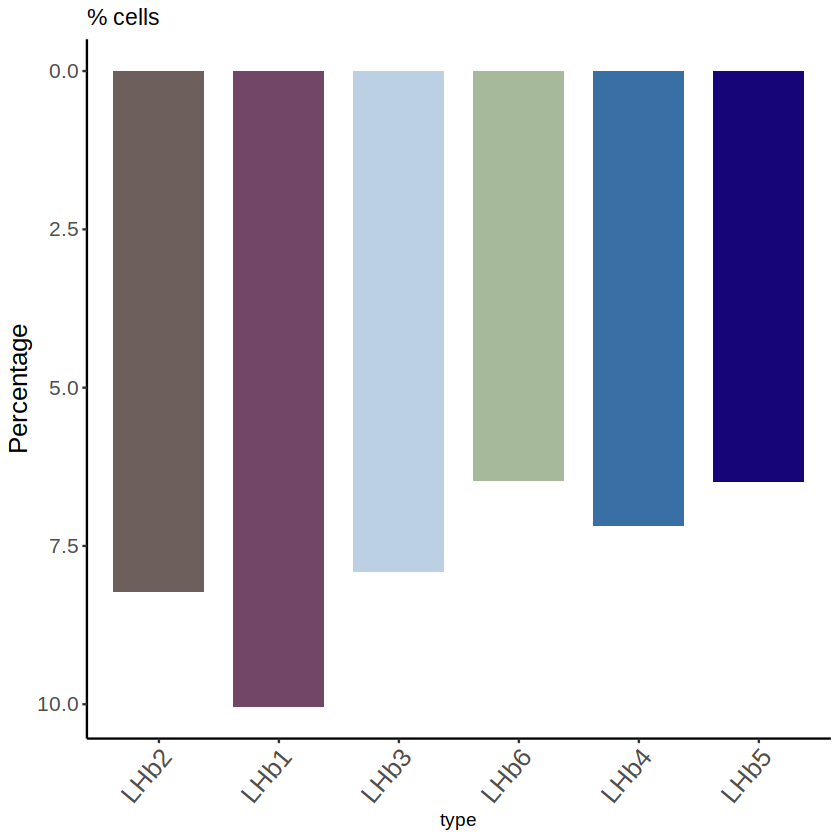

In [204]:
# proportion of cells
ggplot(Cell_number,aes(x=type,y=proportion,fill=Cell_type, width=.75))+geom_bar(stat = "identity",position=position_dodge())+ylab("Percentage")+
#scale_fill_manual(values=c("Astrocyte1"="#19647e","Oligo1"="#ffc857","Neuron1"="#9B0C1E","Neuron2"="#9B0C1E","Neuron3"="#9B0C1E","Neuron4"="#9B0C1E","Neuron5"="#9B0C1E","Neuron6"="#9B0C1E","OPC1"="#4b3f72","OPC2"="#4b3f72","Oligo2"="#ffc857","Neuron7"="#9B0C1E","Microglia"="#676833","Neuron8"="#9B0C1E","Mural"="#b7b7b7","Endotherial"="#E8C6C7","OPC3"="#4b3f72","Oligo3"="#ffc857","Astrocyte2"="#19647e","Eppen"="#B99A69"))+ 
scale_fill_manual(values=colors)+
scale_y_reverse()+
theme(legend.position="none",axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle("% cells")
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/percent of cells_combine_percluster_LHb_allneurons.pdf",height=6, width=10 , paper = "letter")

# Violin/disc plots for marker genes across cell_types

# Violin

In [129]:
Cell_type<-rev(c("MHb3","MHb6","MHb4","MHb5","MHb1","MHb2"))
gene_list<-c("Tac2","Pcdh10","Slc17a6","Slc17a7","Gad1","Gad2","Slc32a1","Gpr151","Pou4f1","Nr4a2","Slc18a3","Chat","Tac1","Calb1","Rapgef4","Kcng4","Calb2","Lynx1","Neurod2","Plcxd2","Syndig1l","Slc5a7","Ntm","Fn3krp","Abhd2","Hsf2","Cck","Adcyap1","Rasd2","Wif1","Fam81a","Gnb4","Spon1","Kcnmb4os2","Cytip","Vangl1","Zmat4","Lmo1")

In [144]:
Cell_type<-rev(c("LHb2","LHb1","LHb3","LHb6","LHb4","LHb5"))
gene_list<-c("Tac2","Pcdh10","Slc17a6","Slc17a7","Gad1","Gad2","Slc32a1","Pou4f1","Nr4a2","Prokr2","Vav2","Nhlh2","Syt6","Chat","Gpr151","Cacna2d1","Slc6a1","Lpar1","Ptn","Cacna2d1","Edil3","Arpp21","Calb2","Pou2f2","Sox1","Iqsec3","Kcnk2","Rbfox1","Lmo3","Sv2c","Fam101b","Chrm2","Cnih3","Maob","Htr2c","Kcnmb4","Cartpt","Foxp2","Fstl1")

In [15]:

#initialize empty data frame
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(Cell_type)){
L<-length(eval(parse(text = paste(Cell_type[i],"_barcode",sep=""))))

Cell_number_t<- data.frame("type" =c(rep(Cell_type[i],L)))
#used normalized uncorrected data
for (p in 1:length(gene_list)){
Cell_number_t[gene_list[p]]<-as.vector(LHb.integrated@assays$RNA@data[gene_list[p],eval(parse(text = paste(Cell_type[i],"_barcode",sep="")))])
}
Cell_number<-rbind(Cell_number_t,Cell_number)}

as.factor(Cell_number$type)

[1] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
  [15] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
  [29] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
  [43] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
  [57] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
  [71] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
  [85] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
  [99] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [113] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [127] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [141] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [155] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [169] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [183] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [197] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [211] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [225] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [239] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [253] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [267] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [281] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [295] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [309] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [323] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [337] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [351] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [365] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [379] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [393] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [407] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [421] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [435] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [449] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [463] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [477] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [491] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [505] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [519] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [533] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [547] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [561] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [575] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [589] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [603] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [617] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [631] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [645] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1
 [659] MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb1 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2
 [673] MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2
 [687] MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2
 [701] MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2
 [715] MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2 MHb2

In [38]:
# single color
for (k in 1:length(gene_list))
    {
if (k==length(gene_list)){assign(paste("P",k,sep=""),ggplot(Cell_number,aes_string(x="type",y=gene_list[k]))+geom_violin(fill='#56B4E9',scale = "width")+stat_summary(fun.y=median, geom="point", size=0.6, color="red")+ylab(gene_list[k])+ theme(axis.title.x=element_blank(),
        ,axis.text.y=element_text(size=5),axis.text.x=element_text(size=7,face="bold"), axis.title=element_text(size=6,face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"),plot.margin = unit(c(0, 0, 0, 0), "cm")))}
else{
    assign(paste("P",k,sep=""),ggplot(Cell_number,aes_string(x="type",y=gene_list[k]))+geom_violin(fill='#56B4E9',scale = "width")+stat_summary(fun.y=median, geom="point", size=0.6, color="red")+ylab(gene_list[k])+ theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(), axis.ticks.x=element_blank(),axis.text=element_text(size=5), axis.title=element_text(size=6,face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"),plot.margin = unit(c(0, 0, 0, 0), "cm")))}

}

In [201]:
#Mhb
colors<-c("#ff6542","#ecd444","#e0cba8","#b6275f","#f5a894","#564154")

In [210]:
#Lhb
colors<-c("#6d5f5c","#724667","#bbd1e3","#a7b99b","#386fa4","#150578")

In [18]:
#specifying colors
for (k in 1:length(gene_list))
    {
if (k==length(gene_list)){
assign(paste("P",k,sep=""),ggplot(Cell_number,aes_string(x="type",y=gene_list[k],fill="type"))+geom_violin(scale = "width")+scale_fill_manual(values=colors)
+ylab(gene_list[k])+ theme(axis.title.x=element_blank(),
,axis.text.y=element_text(size=5),axis.title.y=element_text(size=6,angle=0,face="bold",margin = margin(t = 10, r = 8, b = 0, l = 10),vjust=0.5),axis.text.x=element_text(size=10,face="bold")
,axis.title=element_text(size=8,face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"),legend.position="none",plot.margin = unit(c(0, 0,0, 0), "cm")))}
else{
assign(paste("P",k,sep=""),ggplot(Cell_number,aes_string(x="type",y=gene_list[k],fill="type"))+geom_violin(scale = "width")+scale_fill_manual(values=colors)
+ylab(gene_list[k])+ theme(axis.title.x=element_blank(),
axis.text.x=element_blank(),axis.text.y=element_text(size=5),axis.title.y=element_text(size=6,angle=0,face="bold",margin = margin(t = 10, r = 8, b = 0, l = 10),vjust=0.5),axis.ticks.x=element_blank(),axis.text=element_text(size=5)
,axis.title=element_text(size=8,face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"),legend.position="none",plot.margin = unit(c(0, 0,0, 0), "cm")))}

}

In [20]:
merge<-list()
for (i in length(gene_list):1){   
       if (length(merge)==0){
        merge<-ggplotGrob(eval(parse(text=paste("P",i,sep = ""))))}else{merge<-rbind(ggplotGrob(eval(parse(text=paste("P",i,sep = "")))),merge,size = "last")}}

#all genes
pdf(paste("/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/violin_MHb",".pdf",sep=""),height=4, width=20 , paper = "letter")
grid.newpage()
grid.draw(merge)
dev.off()

png 
  2

disc plot for GPCR

In [140]:
#http://www.informatics.jax.org/vocab/gene_ontology/GO:0004930
GPCR<-read.xlsx2(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/GPCR/results.xlsx", 1,stringsAsFactors = FALSE)

In [141]:
GPCR<-GPCR[grep("receptor",GPCR$detail1),]

In [142]:
sum<-rowSums(as.matrix(LHb.integrated@assays$RNA@data))

In [143]:
#since a few GPCR did not express in neuronal cells, it is better removing them 
notzero<-numeric()
for(i in 1:length(sum)){
if(sum[[i]]>0){
    notzero<-c(notzero,i)
}else{
    notzero<-notzero
}
    }

In [144]:
length(notzero)

[1] 16943

In [145]:
Cell_type<-factor(rev(c("MHb3","MHb6","MHb4","MHb5","MHb1","MHb2","LHb2","LHb1","LHb3","LHb6","LHb4","LHb5")),levels=rev(c("MHb3","MHb6","MHb4","MHb5","MHb1","MHb2","LHb2","LHb1","LHb3","LHb6","LHb4","LHb5")))
gene_list<-intersect(unique(GPCR$gene),rownames(LHb.integrated@assays$RNA@data)[notzero])

In [146]:
gene_list<-sort(gene_list)

In [147]:
length(gene_list)

[1] 239

In [148]:
#gene_list<-rev(gene_list[1:95])
#gene_list<-rev(gene_list[96:190])
gene_list<-rev(gene_list[191:239])

In [149]:
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(gene_list)){
L<-length(Cell_type)

Cell_number_t<- data.frame("cluster" =Cell_type, "gene"=c(rep(gene_list[i],L)))
#used normalized uncorrected data
for (p in 1:length(Cell_type)){
Cell_number_t$pct[p]<-100*sum(LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0)/length(eval(parse(text=paste(Cell_type[p],"_barcode",sep=""))))
Cell_number_t$avg[p]<-(mean(LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))])-mean(LHb.integrated@assays$RNA@data[gene_list[i],]))/sd(LHb.integrated@assays$RNA@data[gene_list[i],])
#for avg only consider the expressed cell
 #t<-LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0
# Cell_number_t$avg[p]<-mean(LHb.integrated@assays$RNA@data[gene_list[i],t])/sd(LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))])    
    }
Cell_number<-rbind(Cell_number_t,Cell_number)}
as.factor(Cell_number$cluster)

[1] LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6
 [16] LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2
 [31] MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5
 [46] MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3
 [61] LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6
 [76] LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2
 [91] MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5
[106] MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3
[121] LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6
[136] LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2
[151] MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5
[166] MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3
[181] LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6
[196] LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2
[211] MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5
[226] MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3
[241] LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6
[256] LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2
[271] MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5
[286] MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3
[301] LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6
[316] LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2
[331] MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5
[346] MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3
[361] LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6
[376] LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2
[391] MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5
[406] MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3
[421] LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6
[436] LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2
[451] MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5
[466] MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3
[481] LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6
[496] LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2
[511] MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5
[526] MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3
[541] LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6
[556] LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2
[571] MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5
[586] MHb4 MHb6 MHb3
Levels: LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3

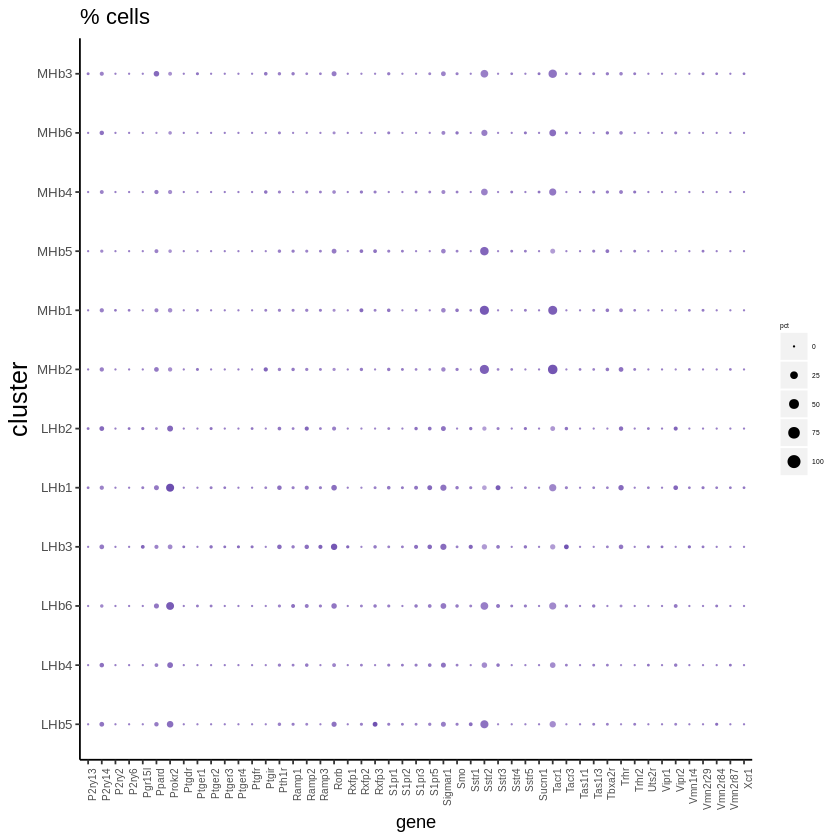

In [151]:
ggplot(Cell_number, aes(gene, cluster)) + geom_point(aes(size = pct, colour=avg)) + 
scale_x_discrete(limits = levels(Cell_number$gene))+scale_color_gradient(low = "white", high = "darkblue",limits = c(-1.5,1.5),oob=squish,guide = "colourbar") + 
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+ scale_size_continuous(range = c(0,3),limits=c(0,100),breaks=seq(0,100,25))+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=8),axis.text.x=element_text(size=6,angle = 90, hjust = 1),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"),legend.title = element_text(size = 4), 
               legend.text = element_text(size = 4))+ggtitle("% cells")+ guides(colour = "none")
              
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/discplots_GPCR_genes_receptor_only_191-239.pdf",height=2.4, width=5 , paper = "letter")

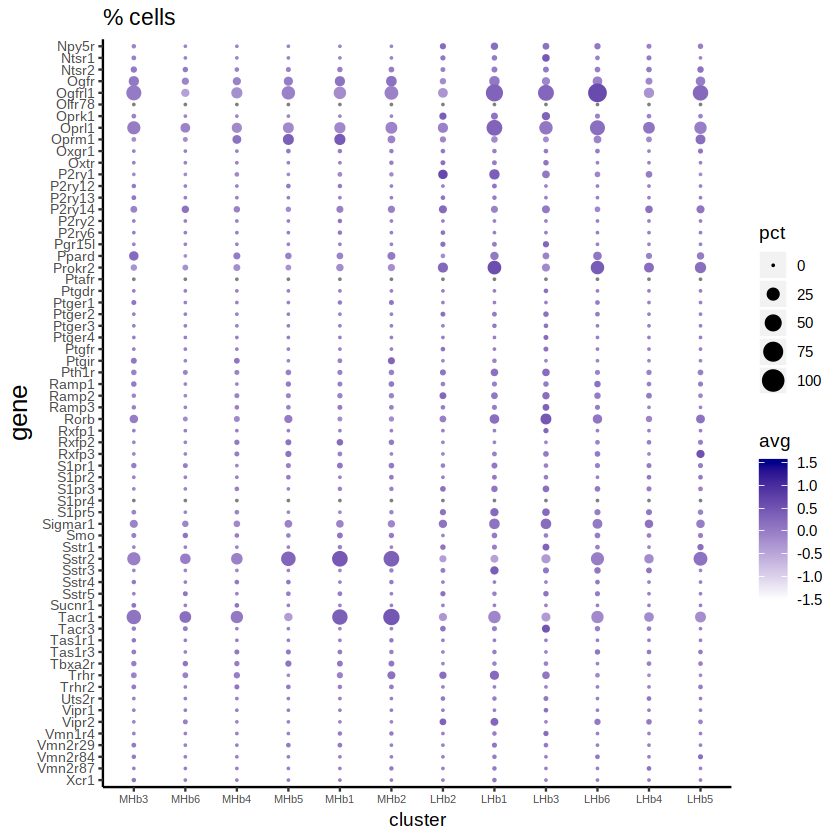

In [190]:
#reverse
ggplot(Cell_number, aes(cluster, gene)) + geom_point(aes(size = pct, colour=avg)) + 
scale_x_discrete(limits = rev(levels(Cell_number$cluster)))+scale_y_discrete(limits =rev(levels(Cell_number$gene)))+
scale_color_gradient(low = "white", high = "darkblue",limits = c(-1.5,1.5),oob=squish) + 
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=8),axis.text.x=element_text(size=6,angle = 0, hjust = 0.5),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle("% cells")
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/discplots_GPCR_genes_receptor_only_196-259rev.pdf",height=20, width=5 , paper = "letter")

In [99]:
#neuropeptide,http://www.informatics.jax.org/go/term/GO:0007218
NP<-read.xlsx2(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/GPCR/neuropeptide.xlsx", 1,stringsAsFactors = FALSE)

In [100]:
NP<-NP[-grep("receptor",NP$detail1),]

In [125]:
Cell_type<-factor(rev(c("MHb3","MHb6","MHb4","MHb5","MHb1","MHb2","LHb2","LHb1","LHb3","LHb6","LHb4","LHb5")),levels=rev(c("MHb3","MHb6","MHb4","MHb5","MHb1","MHb2","LHb2","LHb1","LHb3","LHb6","LHb4","LHb5")))
gene_list<-intersect(unique(NP$gene),rownames(LHb.integrated@assays$RNA@data)[notzero])

In [126]:
gene_list<-sort(gene_list)

In [127]:
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(gene_list)){
L<-length(Cell_type)

Cell_number_t<- data.frame("cluster" =Cell_type, "gene"=c(rep(gene_list[i],L)))
#used normalized uncorrected data
for (p in 1:length(Cell_type)){
Cell_number_t$pct[p]<-100*sum(LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0)/length(eval(parse(text=paste(Cell_type[p],"_barcode",sep=""))))
Cell_number_t$avg[p]<-(mean(LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))])-mean(LHb.integrated@assays$RNA@data[gene_list[i],]))/sd(LHb.integrated@assays$RNA@data[gene_list[i],])
#for avg only consider the expressed cell
 #t<-LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0
# Cell_number_t$avg[p]<-mean(LHb.integrated@assays$RNA@data[gene_list[i],t])/sd(LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))])    
    }
Cell_number<-rbind(Cell_number_t,Cell_number)}
as.factor(Cell_number$cluster)

[1] LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6
 [16] LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2
 [31] MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5
 [46] MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3
 [61] LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6
 [76] LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2
 [91] MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5
[106] MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3
[121] LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6
[136] LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2
[151] MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5
[166] MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3
[181] LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6
[196] LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2
[211] MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5
[226] MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3
[241] LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6
[256] LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2
[271] MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5
[286] MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3
[301] LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6
[316] LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2
[331] MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5
[346] MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3
[361] LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3
Levels: LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3

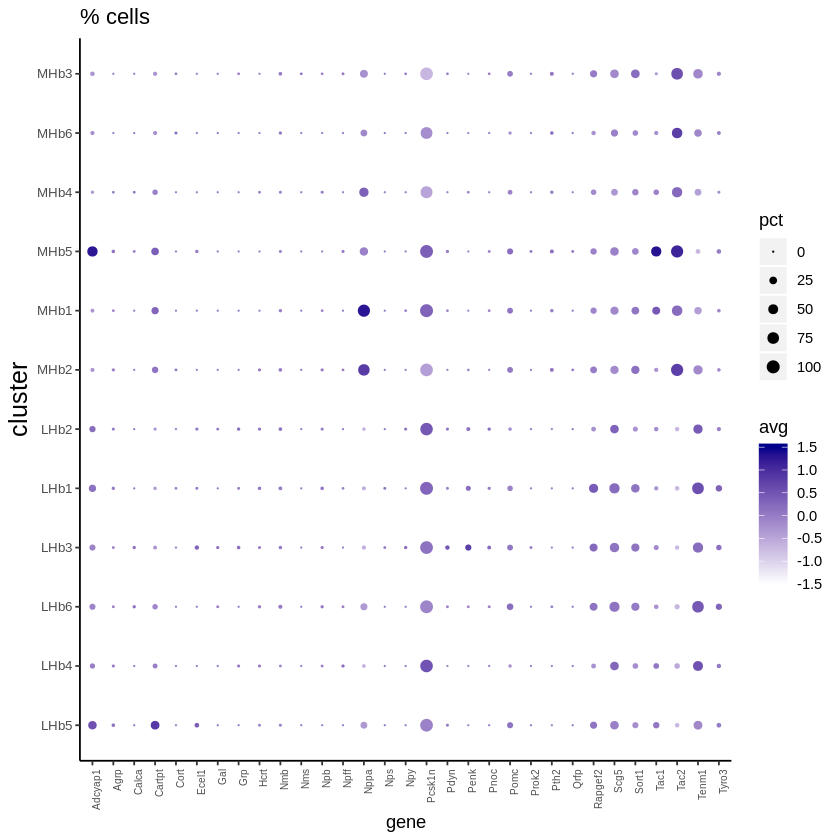

In [128]:
ggplot(Cell_number, aes(gene, cluster)) + geom_point(aes(size = pct, colour=avg)) + 
scale_x_discrete(limits = rev(levels(Cell_number$gene)))+scale_color_gradient(low = "white", high = "darkblue",limits = c(-1.5,1.5),oob=squish) + 
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+ scale_size_continuous(range = c(0,3),limits=c(0,100),breaks=seq(0,100,25))+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=8),axis.text.x=element_text(size=6,angle = 90, hjust = 1),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle("% cells")
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/discplots_neuropeptide_signal_final.pdf",height=2.4, width=4 , paper = "letter")

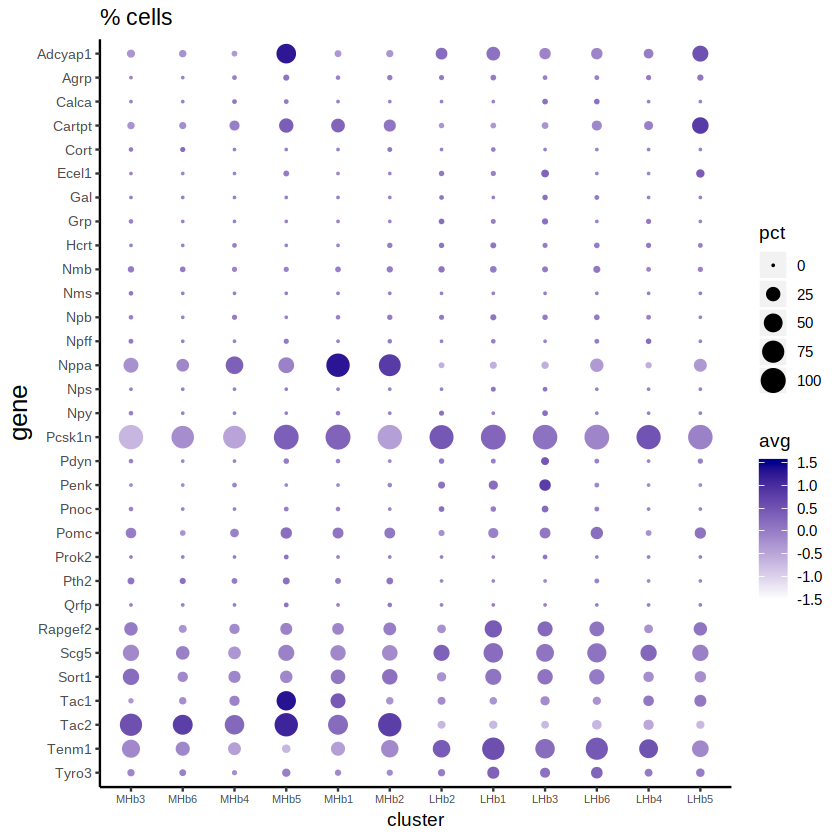

In [381]:
ggplot(Cell_number, aes(cluster, gene)) + geom_point(aes(size = pct, colour=avg)) + 
scale_x_discrete(limits = rev(levels(Cell_number$cluster)))+
scale_color_gradient(low = "white", high = "darkblue",limits = c(-1.5,1.5),oob=squish) + 
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+ scale_size_continuous(range = c(0,6),limits=c(0,100),breaks=seq(0,100,25))+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=8),axis.text.x=element_text(size=6,angle = 0, hjust = 0.5),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle("% cells")
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/discplots_neuropeptide_signal_tightrev.pdf",height=6, width=5 , paper = "letter")

In [ ]:
neurotransmitter
biosysthesis
http://www.informatics.jax.org/go/term/GO:0042136

http://www.mousemine.org/mousemine/portal.do

metabolic

uptake

secretion

transport
http://www.mousemine.org/mousemine/portal.do

M and L rich gene by category

neurotransmitter

In [78]:
NT1<-read.xlsx2(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/ontology/neurotransmitter/neurotransmitter metabolic process.xlsx", 1,stringsAsFactors = FALSE)
NT2<-read.xlsx2(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/ontology/neurotransmitter/neurotransmitter_transport.xlsx", 1,stringsAsFactors = FALSE)
NT3<-read.xlsx2(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/ontology/neurotransmitter/neurotransmitter_uptake.xlsx", 1,stringsAsFactors = FALSE)
NT4<-read.xlsx2(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/ontology/neurotransmitter/neurotransmitter_secretion.xlsx", 1,stringsAsFactors = FALSE)

In [79]:
NT<-rbind(NT1,NT2,NT3,NT4)


In [80]:
MHb<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/class_genes/conserved_markers_MHB_overLHbgene_eachcombined.xlsx",sheetIndex=1)
LHb<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/class_genes/conserved_markers_LHB_overMHbgene_eachcombined.xlsx",sheetIndex=1)

In [81]:
Cell_type<-factor(rev(c("MHb3","MHb6","MHb4","MHb5","MHb1","MHb2","LHb2","LHb1","LHb3","LHb6","LHb4","LHb5")),levels=rev(c("MHb3","MHb6","MHb4","MHb5","MHb1","MHb2","LHb2","LHb1","LHb3","LHb6","LHb4","LHb5")))
gene_list<-c(sort(intersect(unique(NT$gene),MHb[,1])),sort(intersect(unique(NT$gene),LHb[,1])))

In [82]:
length(gene_list)

[1] 49

In [77]:
gene_list<-factor(gene_list,levels=gene_list)

In [270]:
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(gene_list)){
L<-length(Cell_type)

Cell_number_t<- data.frame("cluster" =Cell_type, "gene"=(rep(gene_list[i],L))) # do not use c if the gene is factorizsed
#used normalized uncorrected data
for (p in 1:length(Cell_type)){
Cell_number_t$pct[p]<-100*sum(LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0)/length(eval(parse(text=paste(Cell_type[p],"_barcode",sep=""))))
Cell_number_t$avg[p]<-(mean(LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))])-mean(LHb.integrated@assays$RNA@data[gene_list[i],]))/sd(LHb.integrated@assays$RNA@data[gene_list[i],])
#for avg only consider the expressed cell
 #t<-LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0
# Cell_number_t$avg[p]<-mean(LHb.integrated@assays$RNA@data[gene_list[i],t])/sd(LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))])    
    }
Cell_number<-rbind(Cell_number_t,Cell_number)}
as.factor(Cell_number$cluster)

[1] LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6
 [16] LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2
 [31] MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5
 [46] MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3
 [61] LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6
 [76] LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2
 [91] MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5
[106] MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3
[121] LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6
[136] LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2
[151] MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5
[166] MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3
[181] LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6
[196] LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2
[211] MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5
[226] MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3
[241] LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6
[256] LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2
[271] MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5
[286] MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3
[301] LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6
[316] LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2
[331] MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5
[346] MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3
[361] LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6
[376] LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2
[391] MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5
[406] MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3
[421] LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6
[436] LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2
[451] MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5
[466] MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3
[481] LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6
[496] LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2
[511] MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5
[526] MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3
[541] LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6
[556] LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2
[571] MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5
[586] MHb4 MHb6 MHb3
Levels: LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3

In [271]:
library(scales)
library(reshape2)

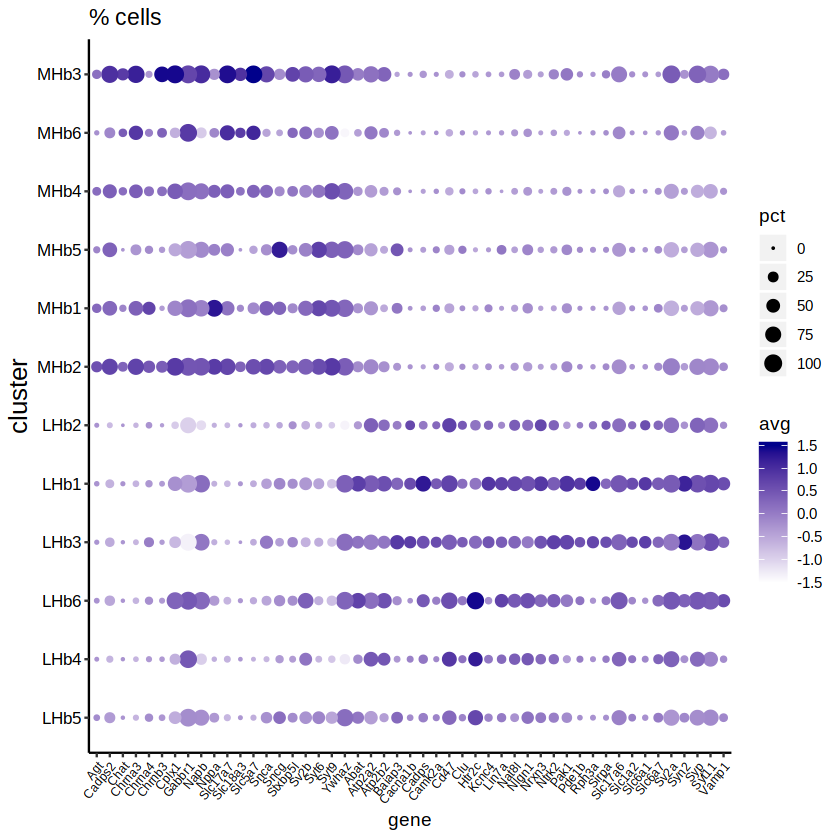

In [272]:
ggplot(Cell_number, aes(gene, cluster)) + geom_point(aes(size = pct, colour=avg)) + 
scale_x_discrete(limits = levels(Cell_number$gene))+
scale_color_gradient(low = "white", high = "darkblue",limits = c(-1.5,1.5),oob=squish) + 
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+ scale_size_continuous(range = c(0,4),limits=c(0,100),breaks=seq(0,100,25))+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=10,colour = "black"),axis.text.x=element_text(size=7,angle = 50, hjust = 1,colour = "black"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle("% cells")
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/ontology/neurotransmitter.pdf",height=5, width=10 , paper = "letter")

ion channel

In [87]:
#http://www.informatics.jax.org/vocab/gene_ontology/GO:0034702
IO<-read.xlsx2(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/ontology/ion_channel/Ion_channel_complex.xlsx", 1,stringsAsFactors = FALSE)

In [88]:
MHb<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/class_genes/conserved_markers_MHB_overLHbgene_eachcombined.xlsx",sheetIndex=1)
LHb<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/class_genes/conserved_markers_LHB_overMHbgene_eachcombined.xlsx",sheetIndex=1)

In [89]:
Cell_type<-factor(rev(c("MHb3","MHb6","MHb4","MHb5","MHb1","MHb2","LHb2","LHb1","LHb3","LHb6","LHb4","LHb5")),levels=rev(c("MHb3","MHb6","MHb4","MHb5","MHb1","MHb2","LHb2","LHb1","LHb3","LHb6","LHb4","LHb5")))
gene_list<-c(sort(intersect(unique(IO$gene),MHb[,1])),sort(intersect(unique(IO$gene),LHb[,1])))

In [90]:
length(gene_list)
length(intersect(gene_list,rownames(LHb.integrated@assays$RNA@data)[notzero]))

[1] 42

[1] 42

In [262]:
gene_list<-factor(gene_list,levels=gene_list)

In [263]:
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(gene_list)){
L<-length(Cell_type)

Cell_number_t<- data.frame("cluster" =Cell_type, "gene"=(rep(gene_list[i],L))) # do not use c if the gene is factorizsed
#used normalized uncorrected data
for (p in 1:length(Cell_type)){
Cell_number_t$pct[p]<-100*sum(LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0)/length(eval(parse(text=paste(Cell_type[p],"_barcode",sep=""))))
Cell_number_t$avg[p]<-(mean(LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))])-mean(LHb.integrated@assays$RNA@data[gene_list[i],]))/sd(LHb.integrated@assays$RNA@data[gene_list[i],])
#for avg only consider the expressed cell
 #t<-LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0
# Cell_number_t$avg[p]<-mean(LHb.integrated@assays$RNA@data[gene_list[i],t])/sd(LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))])    
    }
Cell_number<-rbind(Cell_number_t,Cell_number)}
as.factor(Cell_number$cluster)

[1] LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6
 [16] LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2
 [31] MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5
 [46] MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3
 [61] LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6
 [76] LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2
 [91] MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5
[106] MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3
[121] LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6
[136] LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2
[151] MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5
[166] MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3
[181] LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6
[196] LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2
[211] MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5
[226] MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3
[241] LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6
[256] LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2
[271] MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5
[286] MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3
[301] LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6
[316] LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2
[331] MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5
[346] MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3
[361] LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6
[376] LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2
[391] MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5
[406] MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3
[421] LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6
[436] LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2
[451] MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5
[466] MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3
[481] LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6
[496] LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3
Levels: LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3

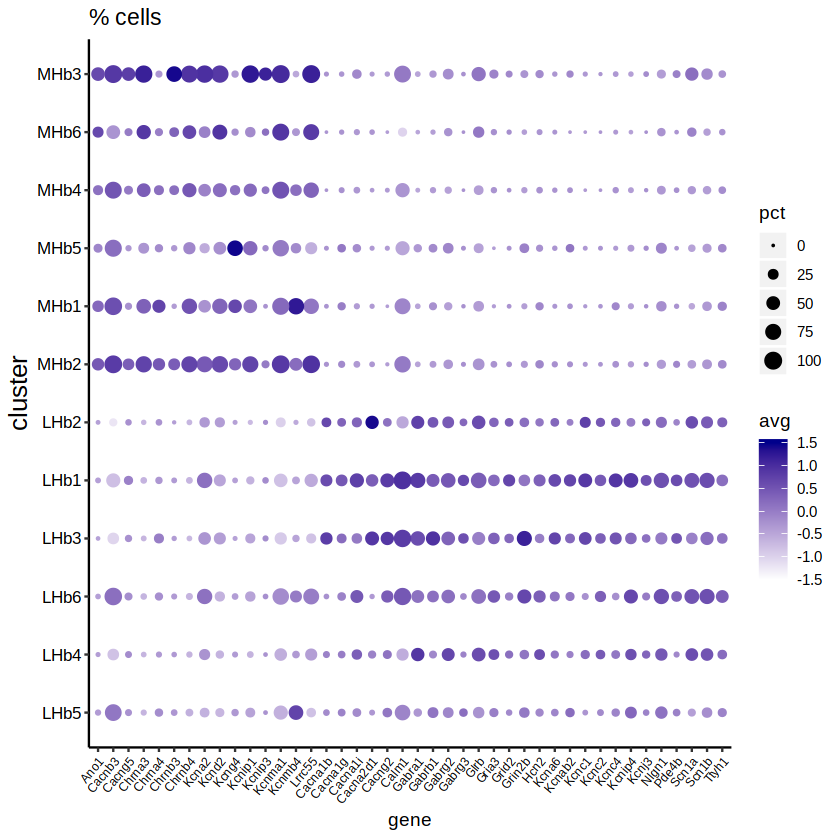

In [264]:
ggplot(Cell_number, aes(gene, cluster)) + geom_point(aes(size = pct, colour=avg)) + 
scale_x_discrete(limits = levels(Cell_number$gene))+
scale_color_gradient(low = "white", high = "darkblue",limits = c(-1.5,1.5),oob=squish) + 
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+ scale_size_continuous(range = c(0,4),limits=c(0,100),breaks=seq(0,100,25))+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=10,colour = "black"),axis.text.x=element_text(size=7,angle = 50, hjust = 1,colour = "black"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle("% cells")
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/ontology/ion_channel_complex.pdf",height=5, width=10 , paper = "letter")

Glutamate receptor, GABA receptor


In [91]:
#removed channel
Glu1<-read.xlsx2(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/ontology/Glutamate_receptor/metabotropic_glutamate_receptor.xlsx", 1,stringsAsFactors = FALSE)
Glu2<-read.xlsx2(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/ontology/Glutamate_receptor/Ionotropic_Glutamate_receptor.xlsx", 1,stringsAsFactors = FALSE)
Glu2<-Glu2[grep("receptor",Glu2$GO),]
Glu<-rbind(Glu1,Glu2)

In [92]:
GABA<-read.xlsx2(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/ontology/GABA_receptor/GABA_receptor.xlsx", 1,stringsAsFactors = FALSE)

In [93]:
MHb<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/class_genes/conserved_markers_MHB_overLHbgene_eachcombined.xlsx",sheetIndex=1)
LHb<-read.xlsx("/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/class_genes/conserved_markers_LHB_overMHbgene_eachcombined.xlsx",sheetIndex=1)

In [94]:
Cell_type<-factor(rev(c("MHb3","MHb6","MHb4","MHb5","MHb1","MHb2","LHb2","LHb1","LHb3","LHb6","LHb4","LHb5")),levels=rev(c("MHb3","MHb6","MHb4","MHb5","MHb1","MHb2","LHb2","LHb1","LHb3","LHb6","LHb4","LHb5")))
gene_list<-unique(c(sort(intersect(unique(Glu$gene),MHb[,1])),c(sort(intersect(unique(GABA$gene),MHb[,1]))),sort(intersect(unique(Glu$gene),LHb[,1])),sort(intersect(unique(GABA$gene),LHb[,1]))))

In [95]:
length(gene_list)
length(intersect(gene_list,rownames(LHb.integrated@assays$RNA@data)[notzero]))

[1] 10

[1] 10

In [386]:
gene_list<-factor(gene_list,levels=gene_list)

In [387]:
Cell_number<- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)

for (i in 1:length(gene_list)){
L<-length(Cell_type)

Cell_number_t<- data.frame("cluster" =Cell_type, "gene"=(rep(gene_list[i],L))) # do not use c if the gene is factorizsed
#used normalized uncorrected data
for (p in 1:length(Cell_type)){
Cell_number_t$pct[p]<-100*sum(LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0)/length(eval(parse(text=paste(Cell_type[p],"_barcode",sep=""))))
Cell_number_t$avg[p]<-(mean(LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))])-mean(LHb.integrated@assays$RNA@data[gene_list[i],]))/sd(LHb.integrated@assays$RNA@data[gene_list[i],])
#for avg only consider the expressed cell
 #t<-LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))]>0
# Cell_number_t$avg[p]<-mean(LHb.integrated@assays$RNA@data[gene_list[i],t])/sd(LHb.integrated@assays$RNA@data[gene_list[i],eval(parse(text=paste(Cell_type[p],"_barcode",sep="")))])    
    }
Cell_number<-rbind(Cell_number_t,Cell_number)}
as.factor(Cell_number$cluster)

[1] LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6
 [16] LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2
 [31] MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5
 [46] MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3
 [61] LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6
 [76] LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2
 [91] MHb2 MHb1 MHb5 MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5
[106] MHb4 MHb6 MHb3 LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3
Levels: LHb5 LHb4 LHb6 LHb3 LHb1 LHb2 MHb2 MHb1 MHb5 MHb4 MHb6 MHb3

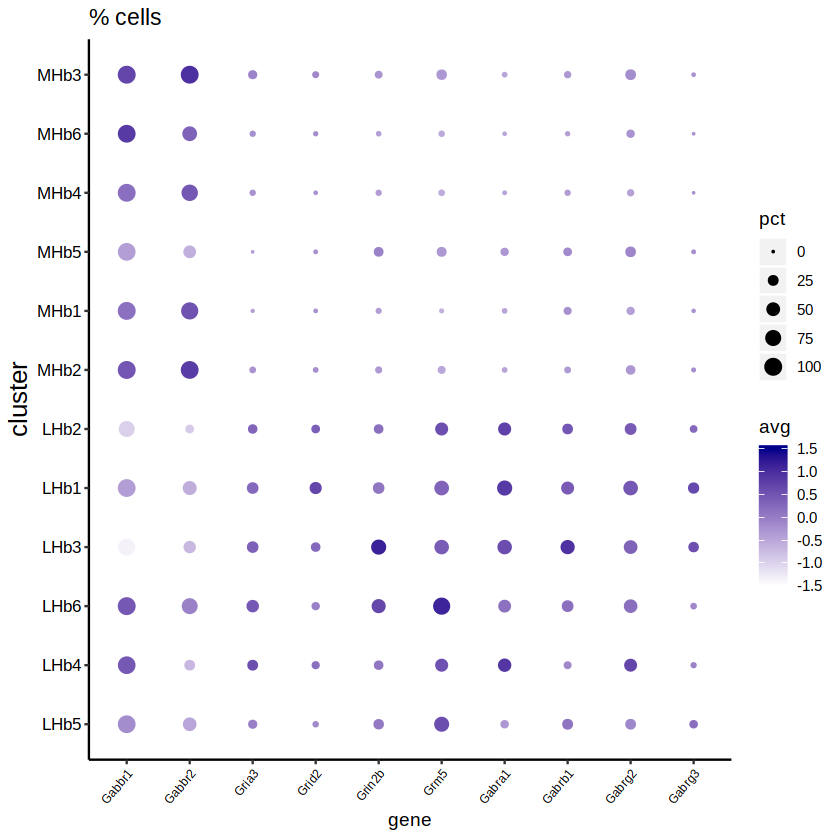

In [389]:
ggplot(Cell_number, aes(gene, cluster)) + geom_point(aes(size = pct, colour=avg)) + 
scale_x_discrete(limits = levels(Cell_number$gene))+
scale_color_gradient(low = "white", high = "darkblue",limits = c(-1.5,1.5),oob=squish) + 
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+ scale_size_continuous(range = c(0,4),limits=c(0,100),breaks=seq(0,100,25))+
theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=10,colour = "black"),axis.text.x=element_text(size=7,angle = 50, hjust = 1,colour = "black"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle("% cells")
ggsave(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/ontology/Glutamate_GABA_receptor.pdf",height=5, width=4.5 , paper = "letter")

# Number of cells per cluster in each condition

In [116]:
Cell_type<-c("MHb3","MHb6","MHb4","MHb5","MHb1","MHb2","LHb2","LHb1","LHb3","LHb6","LHb4","LHb5")
#Cell_type<-c("MHb1","MHb2","MHb3","MHb4","MHb5","MHb6","LHb1","LHb2","LHb3","LHb4","LHb5","LHb6")
# make a data frame for cell number (this data frame is a simple version giving single value for each cluster) 
Cell_number<- data.frame("type" =c(Cell_type,Cell_type), "Cond" = c(rep("cntl",length(Cell_type)),rep("stim",length(Cell_type))))
# be careful with how you define factor and levels
as.factor(Cell_number$type)
as.factor(Cell_number$Cond)
#levels(Cell_number$type)<-c("MHb1","MHb2","MHb3","MHb4","MHb5","MHb6","LHb1","LHb2","LHb3","LHb4","LHb5","LHb6")
levels(Cell_number$type)<-c("MHb3","MHb6","MHb4","MHb5","MHb1","MHb2","LHb2","LHb1","LHb3","LHb6","LHb4","LHb5")


Numberofcells<-vector(mode="numeric", length=0)
proportion<-vector(mode="numeric", length=0)

for (i in 1:dim(Cell_number)[1]){Numberofcells[i]<-length(eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep=""))))}
Cell_number$len<-Numberofcells

for (i in 1:dim(Cell_number)[1]){if (Cell_number$Cond[i]=="cntl"){proportion[i]<-100*length(eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep=""))))/sum(Cell_number$len[grep("cntl",Cell_number$Cond)])} else {proportion[i]<-100*length(eval(parse(text = paste(Cell_number$type[i],"_barcode","_",Cell_number$Cond[i],sep=""))))/sum(Cell_number$len[grep("stim",Cell_number$Cond)])}}
Cell_number$prop<-proportion



[1] MHb3 MHb6 MHb4 MHb5 MHb1 MHb2 LHb2 LHb1 LHb3 LHb6 LHb4 LHb5 MHb3 MHb6 MHb4
[16] MHb5 MHb1 MHb2 LHb2 LHb1 LHb3 LHb6 LHb4 LHb5
Levels: LHb1 LHb2 LHb3 LHb4 LHb5 LHb6 MHb1 MHb2 MHb3 MHb4 MHb5 MHb6

[1] cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl cntl stim stim stim
[16] stim stim stim stim stim stim stim stim stim
Levels: cntl stim

png 
  2

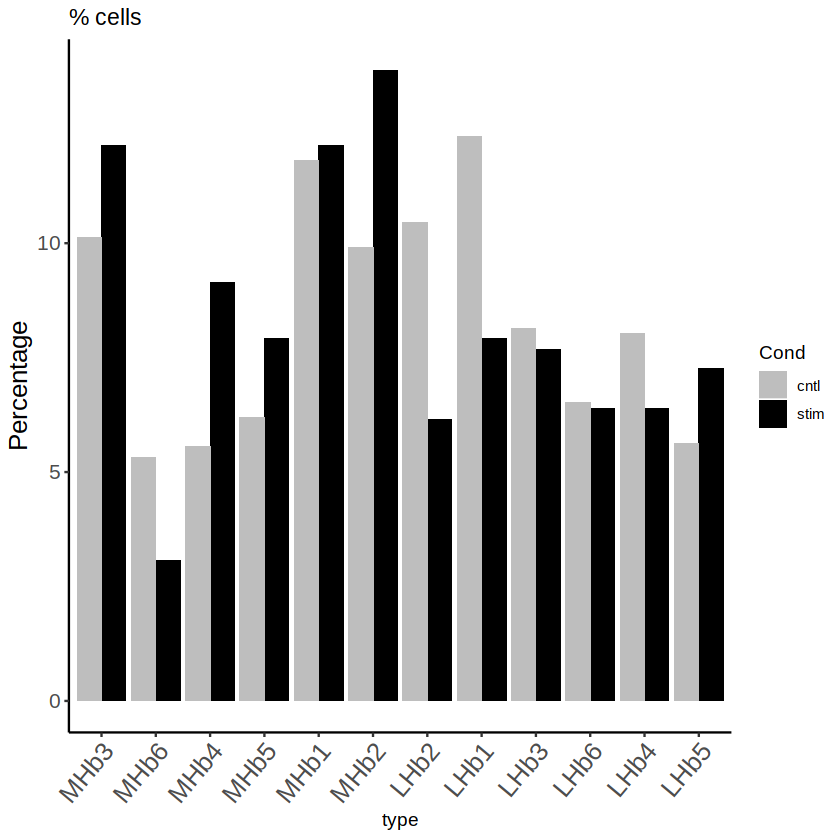

In [117]:
# proportion of cells
ggplot(Cell_number,aes(x=type,y=proportion,fill=Cond))+geom_bar(stat = "identity",position=position_dodge())+ylab("Percentage")+scale_fill_manual(values=c("grey", "black"))+theme(axis.title.y=element_text(size=15),axis.text.y=element_text(size=12),axis.text.x=element_text(size=15,angle = 50, hjust = 1),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ggtitle("% cells")
dev.copy2pdf(file="/media/garret/New Volume/scRNAseq_data/Yoshiko/LHb_integrate/clean/Neurons/gene2000_30/percent of cells2.pdf",height=4, width=20 , paper = "letter")